In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv'
# R^2 = 0.75  Percentage of the Price explained by the indep. variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X\beta + e $$

In [6]:
data = pd.read_csv('house100Data.csv')
train = data.iloc[0:100,:]
train.shape
train
train.shape

(100, 82)

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

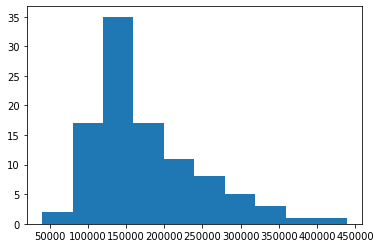

In [3]:
salePrice = train['SalePrice']
salePrice.describe()
plt.hist(salePrice)

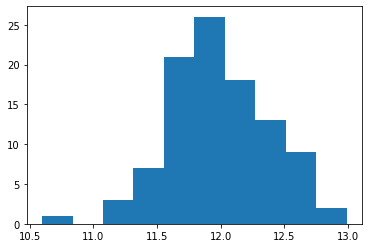

In [4]:
plt.hist(np.log(salePrice))
np.log(salePrice).skew()
target = np.log(salePrice)

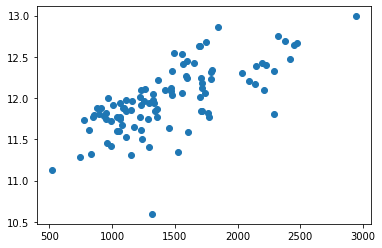

In [5]:
plt.scatter(train['GrLivArea'],y=target)

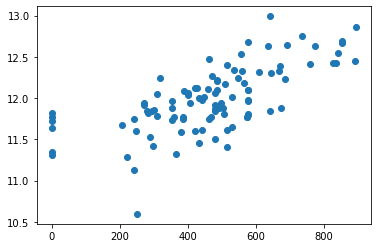

In [6]:
plt.scatter(train['GarageArea'],y=target)

In [7]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
type(nulls)
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

In [8]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols




Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

In [9]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


In [10]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
Y_predict = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8309859964337734


In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_predict)))

Mean Absolute Error: 22547.00727848767
Mean Squared Error: 873115927.2942107
Root Mean Squared Error: 29548.535112492646


(array([ 2.,  4., 19., 26., 26., 13.,  6.,  2.,  0.,  2.]),
 array([-72416.69551558, -54597.83016337, -36778.96481115, -18960.09945894,
         -1141.23410673,  16677.63124549,  34496.4965977 ,  52315.36194991,
         70134.22730213,  87953.09265434, 105771.95800655]),
 <BarContainer object of 10 artists>)

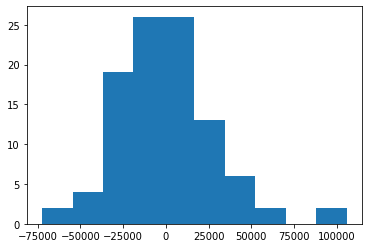

In [32]:
plt.hist(Y - Y_predict)

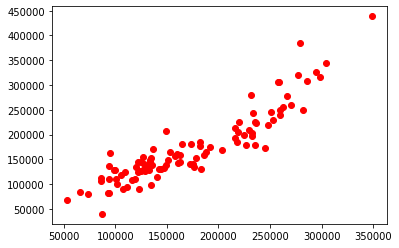

In [33]:
plt.scatter(Y_predict, Y, color = 'r')

In [ ]:
train[['SalePrice', 'OverallQual', 'MasVnrArea']]

In [34]:
test = pd.read_csv('jtest.csv')
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [35]:
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,6,1610,480,2,1977
1,6,1732,476,2,1985
2,5,1535,410,2,1979
3,7,1226,740,3,2009
4,7,1818,240,1,1931
...,...,...,...,...,...
95,6,1456,440,2,1976
96,7,1726,786,3,2007
97,8,3112,795,2,1918
98,6,2229,0,0,1912


In [34]:
Y_pred= model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8309859964337734


In [35]:
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index + ['SalePrice']
cols
numeric = train.select_dtypes(include=[np.number])
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index 
cols + ['SalesPrice']

Index(['SalePriceSalesPrice', 'OverallQualSalesPrice', 'GrLivAreaSalesPrice',
       'GarageAreaSalesPrice', 'GarageCarsSalesPrice', 'YearBuiltSalesPrice'],
      dtype='object')

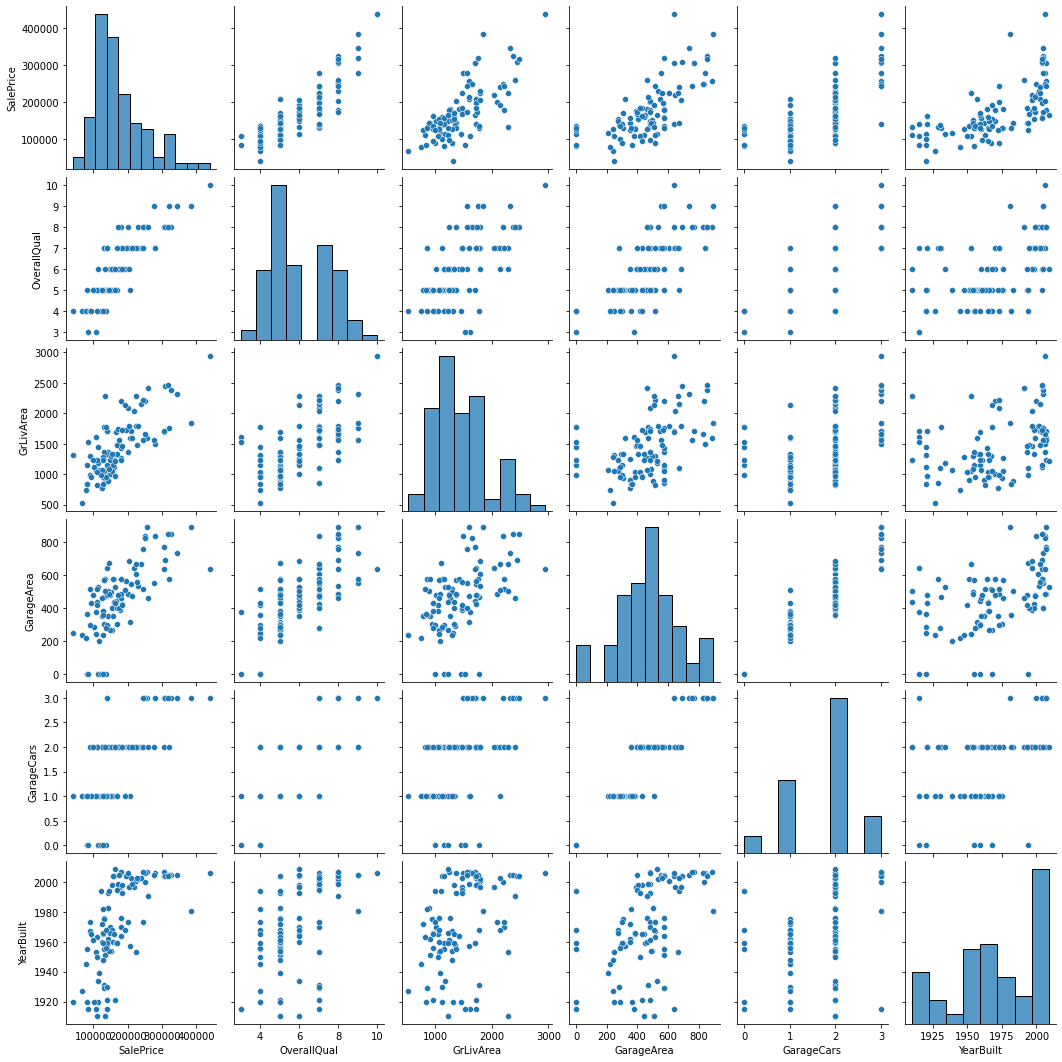

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.pairplot(numeric[cols], height=2.5)
plt.show()

<AxesSubplot:>

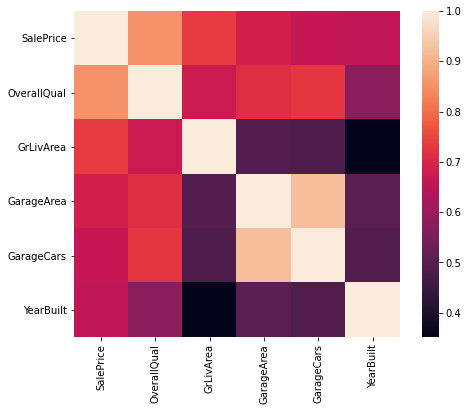

In [37]:
# Build the correlation matrix
matrix = train[cols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=1.0, square=True)

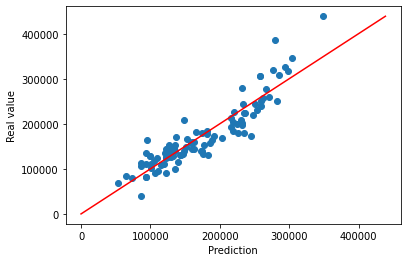

In [38]:


# Build a plot
plt.scatter(Y_pred, Y)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(Y), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()